In [1]:
%cd mmsegmentation-master
%pwd

/home/tan/torch/mmsegmentation-master


'/home/tan/torch/mmsegmentation-master'

In [22]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
! pip install tensorflow -i https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple/ --trusted-host pypi.tuna.com
# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0 True
Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple/
     |████████████████████████████████| 511.7 MB 562 bytes/s a 0:00:01     |████████████▌                   | 200.2 MB 17.0 MB/s eta 0:00:19
     |████████████████████████████████| 1.6 MB 125 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 2.4 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 438 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 91 kB/s s eta 0:00:01
     |████████████████████████████████| 126 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 519 kB/s  eta 0:00:01
     |████████████

     |████████████████████████████████| 77 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 18.6 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=509f9cba6d7e73d686930e7653bc222b0ea81c58a810175c7bd32b94903f5474
  Stored in directory: /home/tan/.cache/pip/wheels/03/b6/57/ea2bb2692c533a5df4412df8d926e526910144e4ae2ba50a8f
Successfully built termcolor
0.24.1


In [2]:
# !mkdir checkpoints
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/mae/upernet_mae-base_fp16_8x2_512x512_160k_ade20k/upernet_mae-base_fp16_8x2_512x512_160k_ade20k_20220426_174752-f92a2975.pth -P checkpoints

In [3]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [4]:
config_file = 'configs/mae/upernet_mae-base_fp16_8x2_512x512_160k_ade20k.py'
checkpoint_file = 'checkpoints/upernet_mae-base_fp16_8x2_512x512_160k_ade20k_20220426_174752-f92a2975.pth'

In [5]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file)

/home/tan/app/conda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/tan/torch/mmsegmentation-master/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: checkpoints/upernet_mae-base_fp16_8x2_512x512_160k_ade20k_20220426_174752-f92a2975.pth


In [6]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

/home/tan/torch/mmsegmentation-master/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


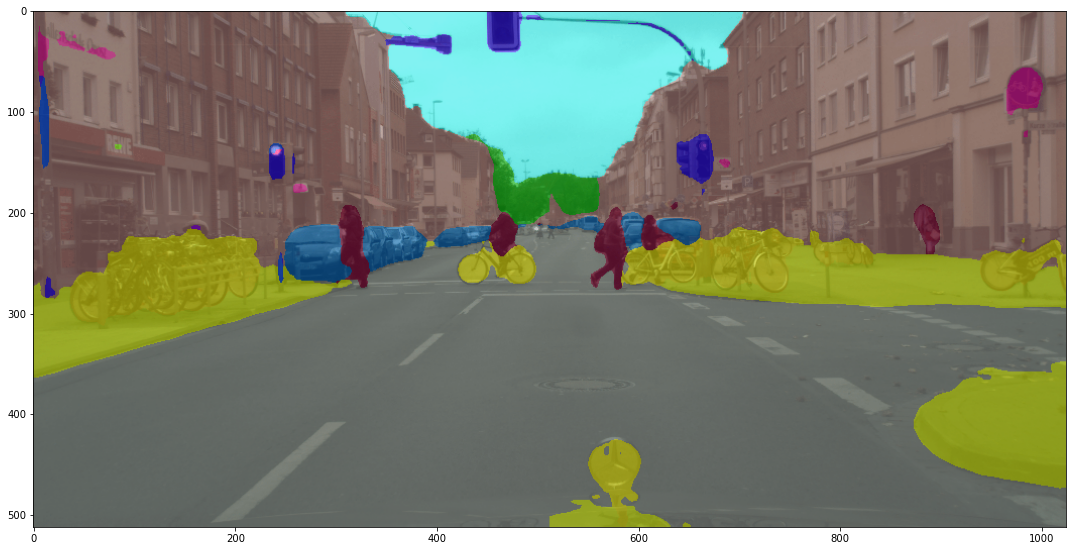

In [7]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))

In [8]:
# download and unzip
# !wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O stanford_background.tar.gz
# !tar xf stanford_background.tar.gz

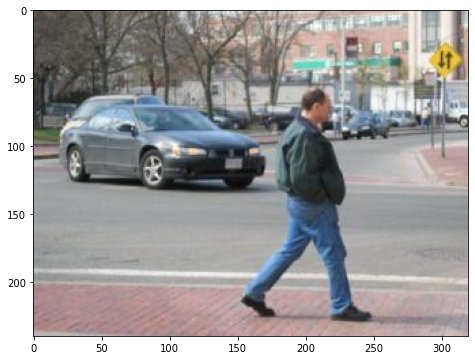

In [9]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [10]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
                                                         '.png')))

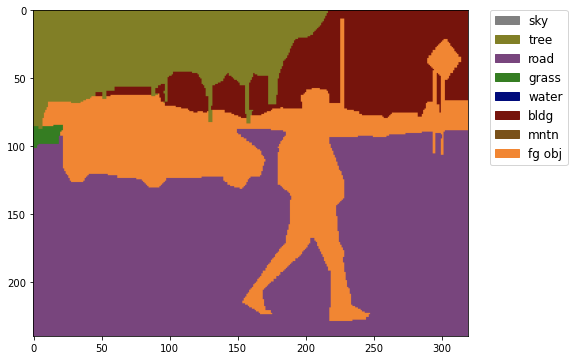

In [11]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('iccv09Data/labels/6000124.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [12]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [13]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class StanfordBackgroundDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

     |▌                               | 8.7 MB 60 kB/s eta 2:18:498^C

ERROR: Operation cancelled by user


In [23]:
from mmcv import Config
cfg = Config.fromfile('configs/mae/upernet_mae-base_fp16_8x2_512x512_160k_ade20k.py')
# Let's have a look at the final config used for training
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8
# Modify dataset type and path

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/upernet_mae-base_fp16_8x2_512x512_160k_ade20k_20220426_174752-f92a2975.pth'
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 200
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

from tensorflow import set_random_seed

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

ImportError: cannot import name 'set_random_seed' from 'tensorflow' (/home/tan/app/conda3/lib/python3.9/site-packages/tensorflow/__init__.py)

In [16]:
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
# mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-05-25 01:08:00,625 - mmseg - INFO - Loaded 25574 images
/home/tan/torch/mmsegmentation-master/mmseg/models/backbones/beit.py:303: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '


AttributeError: 'ConfigDict' object has no attribute 'seed'

In [ ]:
img = mmcv.imread('iccv09Data/images/6000124.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)